In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [14]:
X = []
Y = []
with open('data_1d.csv') as f:
    line_list = f.read().splitlines()
    for line in line_list:
        info = line.split(',')
        X.append(float(info[0]))
        Y.append(float(info[1]))

X = np.array(X)
Y = np.array(Y)

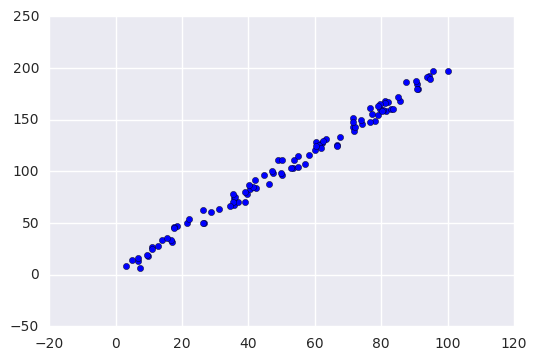

In [19]:
plt.scatter(X, Y)

#### Dot Product: $$a^Tb = \sum_{i=1}^{N}{a_ib_i}$$
#### Numpy:
`a.dot(b)`

In [91]:
common_denominator = np.dot(X, X) - np.mean(X) * np.sum(X)
A_numerator = np.dot(X, Y) - np.mean(Y) * np.sum(X)
B_numerator = np.mean(Y) * np.dot(X, X) - np.mean(X) * np.dot(X, Y)
A = np.divide(A_numerator, common_denominator)
B = np.divide(B_numerator, common_denominator)

R^2: 0.991183820298


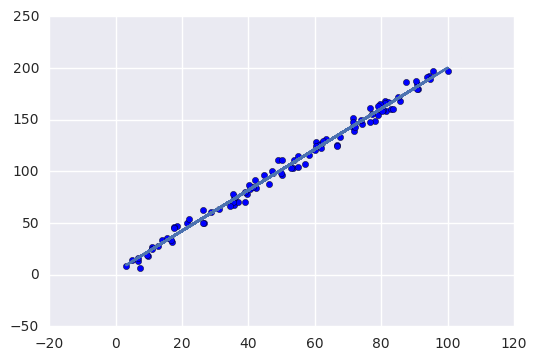

In [116]:
Y_hat = A * X + B

plt.scatter(X, Y)
plt.plot(X, Y_hat)
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print('R^2: {}'.format(R_squared_score))

In [20]:
import re

non_decimal = re.compile(r'[^\d]+')
X = []
Y = []

# Moore's law example
with open('moore.csv') as f:
    lines = f.read().split('\n')
    for line in lines:
        info = line.split('\t')
        year = int(non_decimal.sub('', info[2].split('[')[0]))
        count = int(non_decimal.sub('', info[1].split('[')[0]))
        X.append(year)
        Y.append(count)
        
X = np.array(X)
Y = np.array(Y)
Y = np.log(Y)

In [21]:
common_denominator = np.dot(X, X) - np.mean(X) * np.sum(X)
A_numerator = np.dot(X, Y) - np.mean(Y) * np.sum(X)
B_numerator = np.mean(Y) * np.dot(X, X) - np.mean(X) * np.dot(X, Y)
A = np.divide(A_numerator, common_denominator)
B = np.divide(B_numerator, common_denominator)

R^2: 0.952944285229


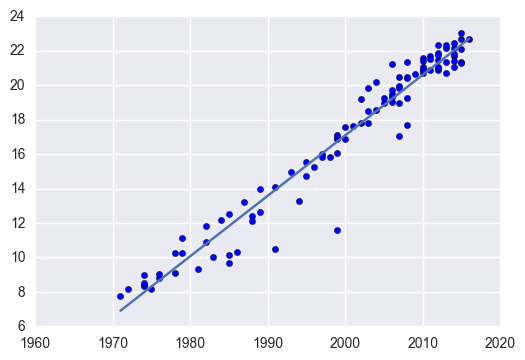

In [22]:
Y_hat = A * X + B

plt.scatter(X, Y)
plt.plot(X, Y_hat)
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print('R^2: {}'.format(R_squared_score))

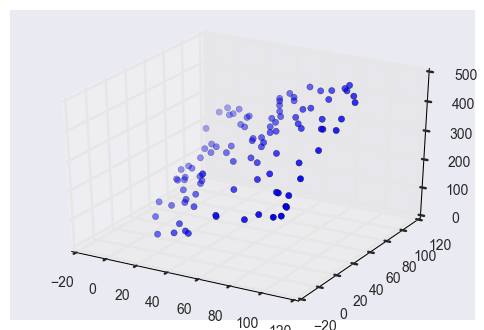

In [25]:
# 3-dimensional linear regression

X = []
Y = []

for line in open('data_2d.csv'):
    x1, x2, y = map(float, line.split(','))
    X.append([x1, x2, 1])
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#### Linear System Solve: $$Ax=b$$
#### $$A = X^{T}X$$
#### $$b = X^{T}Y$$

#### $$A^{-1}(Ax) = A^{-1}B$$
#### $$ (A^{-1}A)x = A^{-1}B$$
#### $$Ix = A^{-1}B$$ where I is the identity matrix
#### $$x = A^{-1}B$$
#### $$x = ({X^{T}X})^{-1}X^{T}Y$$

In [26]:
weight = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, weight)

# Compute R^2
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print("R^2: {}".format(R_squared_score))

R^2: 0.998004061248


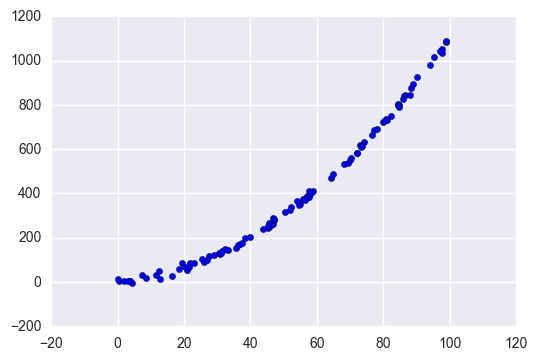

In [64]:
# Non-linear regression
X = []
Y = []

for line in open('data_poly.csv'):
    x, y = map(float, line.split(','))
    X.append([x, x ** 2, 1])
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

plt.scatter(X[:,0], Y)

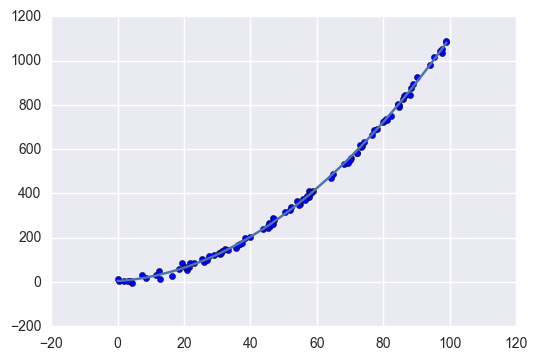

In [65]:
weight = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, weight)

plt.scatter(X[:,0], Y)
plt.plot(sorted(X[:,0]), sorted(Y_hat))

In [66]:
# Compute R^2
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print("R^2: {}".format(R_squared_score))

R^2: 0.999141229637


In [83]:
# Predict blood pressure

df = pd.read_excel('mlr02.xls')
X = df.as_matrix()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


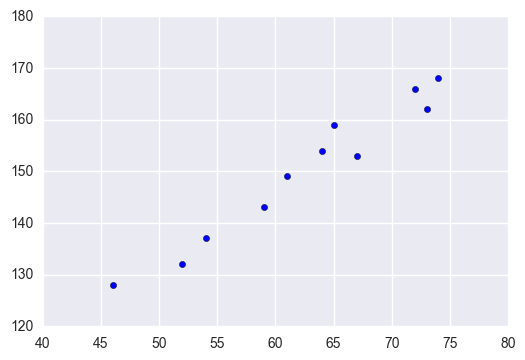

In [85]:
plt.scatter(X[:,1], X[:,0])

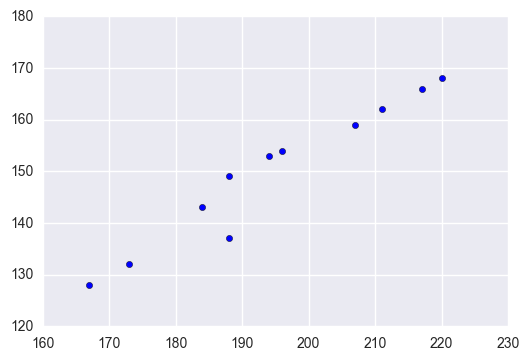

In [86]:
plt.scatter(X[:,2], X[:,0])

In [95]:
def get_rsquared(X, Y):
    weights = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Y_hat = X.dot(weights)
    residual_squared_sum = np.sum(np.square(Y - Y_hat))
    total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
    R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
    return R_squared_score

In [97]:
df['bias'] = 1
X = df[['X2', 'X3', 'bias']]
Y = df['X1']
X2_only = df[['X2', 'bias']]
X3_only = df[['X3', 'bias']]

print('R^2 for x2 only: {}'.format(get_rsquared(X2_only, Y)))
print('R^2 for x3 only: {}'.format(get_rsquared(X3_only, Y)))
print('R^2 for both: {}'.format(get_rsquared(X, Y)))

R^2 for x2 only: 0.957840720815
R^2 for x3 only: 0.941995208529
R^2 for both: 0.97684710415
